In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.model_selection import train_test_split


C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [10]:
dta = sm.datasets.fair.load_pandas().data

In [12]:
#add "affair" column: 1 represents having affairs, 0 represents not 
dta['affair'] = (dta.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children +  religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2', 'C(occupation)[T.3.0]':'occ_3','C(occupation)[T.4.0]':'occ_4','C(occupation)[T.5.0]':'occ_5','C(occupation)[T.6.0]':'occ_6','C(occupation_husb)[T.2.0]':'occ_husb_2','C(occupation_husb)[T.3.0]':'occ_husb_3','C(occupation_husb)[T.4.0]':'occ_husb_4','C(occupation_husb)[T.5.0]':'occ_husb_5','C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

In [13]:
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [14]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [15]:
X.describe()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
count,6366.0,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,1.0,0.134936,0.437166,0.288093,0.116243,0.017122,0.205467,0.076971,0.318882,0.279453,0.083255,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865
std,0.0,0.341682,0.496075,0.452910,0.320541,0.129737,0.404074,0.266567,0.466080,0.448766,0.276289,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000
75%,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000


The intercept feature has the value as 1.0 in all the rows and hence is not a useful feature for our prediction and can be dropped

In [37]:
X = X.iloc[:,1:]
X

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
X_scaled

array([[ 2.531984  , -0.88131913, -0.63614294, ...,  1.11844056,
         0.65334148,  1.28115287],
       [-0.3949472 ,  1.13466276, -0.63614294, ...,  1.11844056,
        -1.62378518, -0.09636416],
       [-0.3949472 ,  1.13466276, -0.63614294, ..., -0.97454634,
        -1.62378518,  0.82198052],
       ...,
       [-0.3949472 ,  1.13466276, -0.63614294, ..., -0.97454634,
        -0.48522185, -0.09636416],
       [-0.3949472 ,  1.13466276, -0.63614294, ..., -0.27688404,
         0.65334148, -0.09636416],
       [ 2.531984  , -0.88131913, -0.63614294, ..., -0.97454634,
        -0.48522185,  0.82198052]])

In [40]:
# Check VIF for colinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

In [41]:
vif

,vif,Features
0,19.340780,occ_2
1,39.335618,occ_3
2,32.931910,occ_4
3,17.057165,occ_5
4,3.697959,occ_6
5,5.566292,occ_husb_2
6,2.991070,occ_husb_3
7,6.930281,occ_husb_4
8,6.577077,occ_husb_5
9,3.185266,occ_husb_6


We can see that features occ_2, occ_3, occ_4, occ_5 have VIF score of more than 10

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=99)
print(X_train.shape)
print(X_test.shape)

(5092, 16)
(1274, 16)


In [59]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [45]:
import pickle
# writing different model files to file
with open('modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)

with open('StandardScaler.sav', 'wb') as f:
    pickle.dump(scaler,f)

Lets see how our models performs on test dataset

In [60]:
y_pred = log_reg.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7315541601255887

In [62]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[774,  99],
       [243, 158]], dtype=int64)

Lets try after removing some of colinear features

In [51]:
X_new = X.drop(columns=['occ_2', 'occ_3', 'occ_4', 'occ_5'], axis=1)
X_scaled_new = scaler.fit_transform(X_new)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_new, y, test_size=0.2, random_state=99)

In [53]:
log_reg_new = LogisticRegression()
log_reg_new.fit(X_train, y_train)

LogisticRegression()

In [56]:
accuracy = accuracy_score(y_test, log_reg_new.predict(X_test))
accuracy

0.7229199372056515

In [57]:
conf_mat = confusion_matrix(y_test, log_reg_new.predict(X_test))
conf_mat

array([[775,  98],
       [255, 146]], dtype=int64)

We can see that the accuracy has not improved even after removing the colinear feature


In [63]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [65]:
accuracy = (true_positive + true_negative) / (true_positive+true_negative+false_positive+false_negative)
accuracy

0.7315541601255887

In [66]:
# Recall
recall = true_positive / (true_positive+false_negative)
recall

0.7610619469026548

In [67]:
# Precision
precision = true_positive/(true_positive + false_positive)
precision

0.8865979381443299

In [68]:
# f1 score
f1_score = 2 * ((precision * recall)/(precision+recall)) 
f1_score

0.8190476190476191

In [71]:
tpr = true_positive/(true_positive+false_negative)
tpr

0.7610619469026548

In [72]:
# Area under the curve
auc = roc_auc_score(y_test, y_pred)
auc

0.6403064503689231

### ROC

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

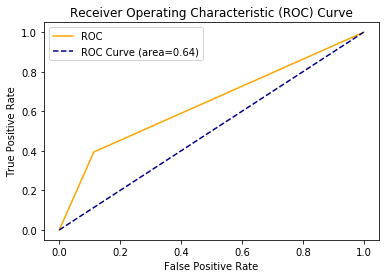

In [74]:
plt.plot(fpr, tpr, color='orange', label='ROC' )
plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='ROC Curve (area=%0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()